![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)

In [84]:
import akshare as ak
import tushare as ts
import pandas as pd

pro = ts.pro_api('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

def ts_code(code):
    if code.startswith('6'):
        code = code+'.SH'
    else:
        code = code+'.SZ'
    return code


In [85]:
data = pd.DataFrame()

month_list = [i.strftime("%Y-%m") for i in pd.date_range(start="2020-01" , end="2021-09", freq='M')]

for month in month_list:
    stock_em_tfp_df = ak.stock_em_tfp(month)
    stock_em_tfp_df = stock_em_tfp_df[(stock_em_tfp_df['停牌期限']=='连续停牌') & (stock_em_tfp_df['停牌原因']=='交易异常波动')]
    data = data.append(stock_em_tfp_df)
data = data.drop_duplicates(subset=['代码'])

In [86]:
data

,代码,名称,停牌时间,停牌截止时间,停牌期限,停牌原因,所属市场,预计复牌时间
3,300301,长方集团,2020-09-09 09:30,2020-09-21 15:00,连续停牌,交易异常波动,创业板,2020-09-22
45,300722,新余国科,2020-10-12 09:30,2020-10-13 15:00,连续停牌,交易异常波动,创业板,2020-10-14
8,300645,正元智慧,2020-10-23 09:30,2020-10-27 15:00,连续停牌,交易异常波动,创业板,2020-10-28
35,002647,仁东控股,2021-03-09 09:30,2021-03-15 15:00,连续停牌,交易异常波动,深主板A股,2021-03-16
36,000980,*ST众泰,2021-03-23 09:30,2021-04-06 15:00,连续停牌,交易异常波动,,2021-04-07
22,003039,顺控发展,2021-04-07 09:30,2021-04-13 15:00,连续停牌,交易异常波动,深主板A股,2021-04-14
19,002762,金发拉比,2021-04-19 09:30,2021-04-23 15:00,连续停牌,交易异常波动,深主板A股,2021-04-26
3,300339,润和软件,2021-06-18 09:30,2021-06-24 15:00,连续停牌,交易异常波动,创业板,2021-06-25
3,600112,*ST天成,2021-07-09 09:30,2021-07-22 15:00,连续停牌,交易异常波动,沪市A股,2021-07-23
44,300827,上能电气,2021-08-02 09:30,,连续停牌,交易异常波动,创业板,


In [83]:
data['停牌时间'][1].split(' ')[0].replace('-','')

'20201023'

In [96]:
#先建立一个字典，用来存储指数对应的PE
all_data = {} 

#遍历index_list里面的指数，我上面只选取了两个
for (name, inl, re_date) in zip(data['名称'],data['代码'],data['停牌时间']):
    s_date = re_date.split(' ')[0].replace('-','')
    stock_data = pro.daily(ts_code=ts_code(inl),start_date=s_date)
    stock_data['trade_date'] = pd.to_datetime(stock_data['trade_date'], format='%Y%m%d')
    stock_data.set_index('trade_date', inplace=True)
    all_data[name]= stock_data
#用for循环遍历指数的PE并转换为dataframe的形式
price_data = pd.DataFrame({tic: price['close']
                    for tic, price in all_data.items()})

In [97]:
price_data.tail()

,长方集团,新余国科,正元智慧,仁东控股,*ST众泰,顺控发展,金发拉比,润和软件,*ST天成,上能电气,*ST赫美
trade_date,,,,,,,,,,,
2021-07-27,3.89,56.20,17.66,8.41,6.66,31.21,10.86,38.66,4.29,NaN,NaN
2021-07-28,3.60,49.97,17.03,8.04,6.33,29.98,10.69,34.03,4.08,NaN,NaN
2021-07-29,4.15,51.87,17.21,8.35,6.34,31.03,11.19,34.34,3.88,NaN,NaN
2021-07-30,4.09,51.79,17.20,8.45,6.36,31.06,11.90,38.40,3.69,NaN,NaN
2021-08-02,4.00,53.32,18.42,8.57,6.20,32.31,11.62,35.62,3.51,NaN,NaN


<AxesSubplot:xlabel='trade_date'>

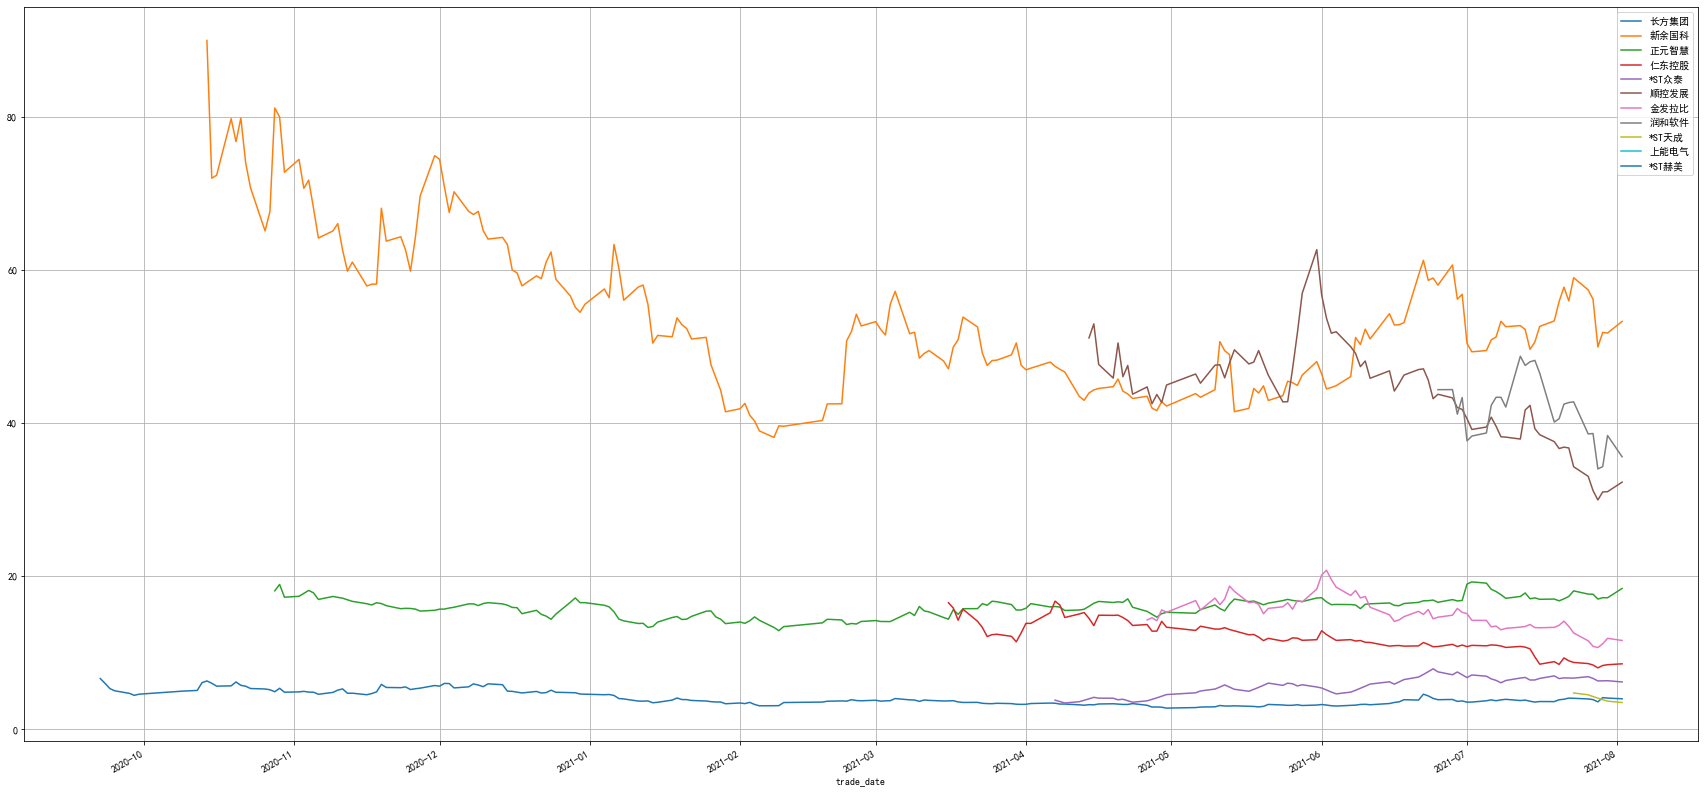

In [98]:
import matplotlib.pyplot as plt

price_data.plot(grid=True, figsize=(30, 15))

![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)